In [12]:
# 1 import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# 2 load data
df = pd.read_csv("data/iris.csv")
df.info()
print("-" * 30)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...        

In [10]:
# 3 word embedding
data = pd.get_dummies(df, columns=["Species"])
data["Species_Iris-setosa"] = data["Species_Iris-setosa"].astype("float32")
data["Species_Iris-versicolor"] = data["Species_Iris-versicolor"].astype("float32")
data["Species_Iris-virginica"] = data["Species_Iris-virginica"].astype("float32")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       150 non-null    int64  
 1   SepalLengthCm            150 non-null    float64
 2   SepalWidthCm             150 non-null    float64
 3   PetalLengthCm            150 non-null    float64
 4   PetalWidthCm             150 non-null    float64
 5   Species_Iris-setosa      150 non-null    float32
 6   Species_Iris-versicolor  150 non-null    float32
 7   Species_Iris-virginica   150 non-null    float32
dtypes: float32(3), float64(4), int64(1)
memory usage: 7.7 KB


In [13]:
# 4 split data
x, y = train_test_split(data, test_size=0.2, random_state=123)
print(type(x), "\n", x)
print(type(y), "\n", y)

<class 'pandas.core.frame.DataFrame'> 
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
130  131            7.4           2.8            6.1           1.9  \
119  120            6.0           2.2            5.0           1.5   
29    30            4.7           3.2            1.6           0.2   
0      1            5.1           3.5            1.4           0.2   
62    63            6.0           2.2            4.0           1.0   
..   ...            ...           ...            ...           ...   
17    18            5.1           3.5            1.4           0.3   
98    99            5.1           2.5            3.0           1.1   
66    67            5.6           3.0            4.5           1.5   
126  127            6.2           2.8            4.8           1.8   
109  110            7.2           3.6            6.1           2.5   

     Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
130                  0.0                   

In [15]:
# scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit(data).transform(x)
y_scaled = ss.fit(data).transform(y)
print(type(x_scaled), "\n", x_scaled)

<class 'numpy.ndarray'> 
 [[ 1.28174608e+00  1.88617985e+00 -5.87763531e-01  1.33141568e+00
   9.22063763e-01 -7.07106781e-01 -7.07106781e-01  1.41421356e+00]
 [ 1.02770632e+00  1.89829664e-01 -1.97618132e+00  7.05892939e-01
   3.96171883e-01 -7.07106781e-01 -7.07106781e-01  1.41421356e+00]
 [-1.05080084e+00 -1.38535265e+00  3.37848329e-01 -1.22754100e+00
  -1.31297673e+00  1.41421356e+00 -7.07106781e-01 -7.07106781e-01]
 [-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00  1.41421356e+00 -7.07106781e-01 -7.07106781e-01]
 [-2.88681550e-01  1.89829664e-01 -1.97618132e+00  1.37235899e-01
  -2.61192967e-01 -7.07106781e-01  1.41421356e+00 -7.07106781e-01]
 [ 4.27248694e-01 -1.02184904e+00 -1.74477836e+00 -2.60824029e-01
  -2.61192967e-01 -7.07106781e-01  1.41421356e+00 -7.07106781e-01]
 [ 1.30484061e+00  2.49201920e+00  1.72626612e+00  1.50201279e+00
   1.05353673e+00 -7.07106781e-01 -7.07106781e-01  1.41421356e+00]
 [-1.60506942e+00 -5.37177559e-01  1.957669

In [36]:
# 6 to tensor
x = torch.from_numpy(x_scaled).to(device)
y = torch.from_numpy(y_scaled).to(device)
x = x[:, :5]
y = y[:, :5]
print(type(x), "\n", x.size(), "\n", y.size(), x)

<class 'torch.Tensor'> 
 torch.Size([120, 5]) 
 torch.Size([30, 5]) tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00],
        [-1.3510e+00, -5.3718e-01,  1.9577e+00, -1.3981e+00, -1.0500e+00],
        [ 1.7321e-01, -5.2506e-02, -8.1917e-01,  8.0370e-02,  1.7530e-03],
        [-3.3487e-01, -1.0218e+00, -2.4390e+00, -1.4709e-01, -2.6119e-01],
        [-9.1223e-01, -1.0218e+00,  3.3785e-01, -1.4550e+00, -1.3130e+00],
        [ 1.5820e+00,  1.1592e+0

In [37]:
# 7 kmeans
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance="euclidean", device=device
)

print(cluster_ids_x)
print(cluster_centers)

running k-means on cuda:0..


[running kmeans]: 5it [00:00, 176.28it/s, center_shift=0.000000, iteration=5, tol=0.000100]

tensor([0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0,
        2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1,
        0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2,
        2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2,
        1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0])
tensor([[ 1.0188,  1.0504, -0.0241,  1.0150,  1.0637],
        [-1.1850, -1.0022,  0.8757, -1.3028, -1.2384],
        [ 0.1107, -0.0029, -0.7981,  0.2923,  0.1870]])


In [38]:
# 8 predict
cluster_ids_y = kmeans_predict(y, cluster_centers, "euclidean", device=device)
print(cluster_ids_y)
print(len(cluster_ids_y))

predicting on cuda:0..
tensor([2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0,
        1, 1, 1, 2, 0, 1])
30


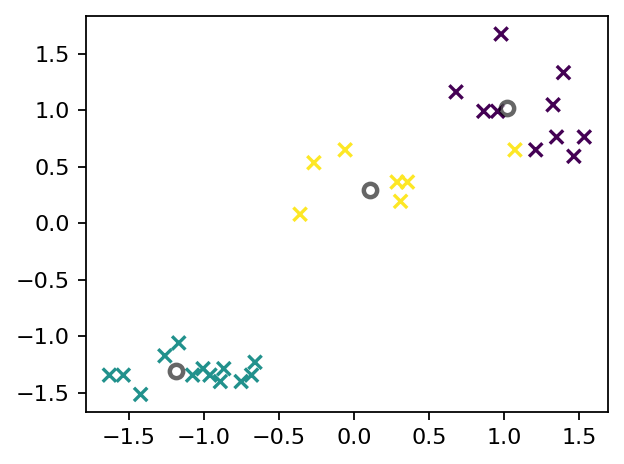

In [42]:
# 9 plot
import matplotlib.pyplot as plt

y = y.to("cpu")
cluster_centers = cluster_centers.to("cpu")
cluster_ids_y = cluster_ids_y.to("cpu")

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 3], c=cluster_ids_y, cmap="viridis", marker="x")

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 3],
    c="white",
    alpha=0.6,
    edgecolors="black",
    linewidths=2,
)

plt.tight_layout()
plt.show()